In [1]:
import numpy as np
import pandas as pd
import os
import pathlib

# data viz
from matplotlib import pyplot as plt
import seaborn as sns           # for nicer plots
sns.set(style="darkgrid")       # default style

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# tf
import tensorflow as tf

# other
from scipy.stats import poisson, randint


# Step 1: Data Ingestion

Available at `02-choose-trgt-and-preprocess-imputemeansubgr-imbalance-sa.ipynb` notebook

# Step 2: Data Preprocessing

Available at `02-choose-trgt-and-preprocess-imputemeansubgr-imbalance-sa.ipynb` notebook

# Step 3: Exploratory Data Analysis

EDA for balanced data is available at `03-eda-imputemeansubgr-smotenc-sa.ipynb` notebook

# Step 4: Consider Feature Selection

Exploration of feature selection using pearson correlation and feature importance are available in `04-feature-select-imputemeansubgr-smontenc-sa.ipynb` notebook. Since we have over 51,500 samples to feature ratio, we will use all features from Step 2 in model building.

# Step 5: Modeling (Base Model - Random Forrest)

`load preprocessed data`

In [2]:
DATA_PATH = '../data/processed/'
FILE_NAME = 'fpafod_imb_scaled.npz'

fpafod = np.load(DATA_PATH+FILE_NAME)

In [3]:
fpafod.files

['X_train_std', 'Y_train', 'X_val_std', 'Y_val', 'X_test_std', 'Y_test']

In [4]:
X_train_std = fpafod['X_train_std']
Y_train = fpafod['Y_train']
X_val_std = fpafod['X_val_std']
Y_val = fpafod['Y_val']
X_test_std = fpafod['X_test_std']
Y_test = fpafod['Y_test']

print(f"\nShape of X_train_std: {X_train_std.shape}")
print(f"Shape of X_val_std: {X_val_std.shape}")
print(f"Shape of X_test_std: {X_test_std.shape}")

print(f"\nShape of Y_train: {Y_train.shape}")
print(f"Shape of Y_val: {Y_val.shape}")
print(f"Shape of Y_test: {Y_test.shape}")


Shape of X_train_std: (1381512, 104)
Shape of X_val_std: (460504, 104)
Shape of X_test_std: (460505, 104)

Shape of Y_train: (1381512,)
Shape of Y_val: (460504,)
Shape of Y_test: (460505,)


#### Train Model

`Initial model`

In [5]:
# use the RandomForestClassifier from sklearn to train X_train_res_std and Y_train_resampled
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                n_jobs=1, # default
                                random_state=207,
                                max_features= 'sqrt', # default
                                max_depth=8 
                                )

clf_forest = forest.fit(X_train_std, Y_train)

In [6]:
def print_report(fitted_clf, X, Y, txt = 'Data'):
    target_labels = ['small', 'medium', 'large', 'very large']
    Y_pred = fitted_clf.predict(X)
    print(f"\n*** {txt} ***")
    print(classification_report(Y, Y_pred, target_names=target_labels, digits=5))


In [7]:
print_report(clf_forest, X=X_train_std, Y=Y_train, txt="Training Data")
print_report(clf_forest, X=X_val_std, Y=Y_val, txt="Validation Data")


*** Training Data ***
              precision    recall  f1-score   support

       small    0.97363   1.00000   0.98664   1345082
      medium    0.00000   0.00000   0.00000     33560
       large    0.00000   0.00000   0.00000      2210
  very large    0.00000   0.00000   0.00000       660

    accuracy                        0.97363   1381512
   macro avg    0.24341   0.25000   0.24666   1381512
weighted avg    0.94796   0.97363   0.96062   1381512



/Users/shantiagung/Documents/mids/mids-w207-section1-team1-finalproject/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shantiagung/Documents/mids/mids-w207-section1-team1-finalproject/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shantiagung/Documents/mids/mids-w207-section1-team1-finalproject/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels


*** Validation Data ***
              precision    recall  f1-score   support

       small    0.97363   1.00000   0.98664    448361
      medium    0.00000   0.00000   0.00000     11185
       large    0.00000   0.00000   0.00000       738
  very large    0.00000   0.00000   0.00000       220

    accuracy                        0.97363    460504
   macro avg    0.24341   0.25000   0.24666    460504
weighted avg    0.94796   0.97363   0.96062    460504



/Users/shantiagung/Documents/mids/mids-w207-section1-team1-finalproject/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shantiagung/Documents/mids/mids-w207-section1-team1-finalproject/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shantiagung/Documents/mids/mids-w207-section1-team1-finalproject/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

In [8]:
def plot_confusion_matrix_rf(fitted_clf):
    Y_val_pred = fitted_clf.predict(X_val_std)
    target_labels = ['small', 'medium', 'large', 'very large']
    cf = tf.math.confusion_matrix(Y_val, Y_val_pred)
    ax = sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',
                    cbar=False,
                    annot_kws={'fontsize': 10},
                    xticklabels=target_labels,
                    yticklabels=target_labels)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set(xlabel='Predicted Label', ylabel='True Label')
    ax.set_title('Baseline Model Confusion matrix: Validation data')
    plt.show() 

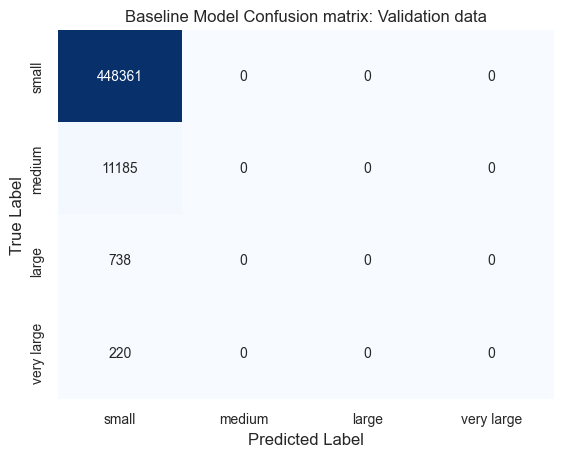

In [9]:
plot_confusion_matrix_rf(clf_forest)

`tune model`

In [10]:
def train_and_evaluate_rf(criterion='entropy',
                          n_estimators=10, 
                          max_features= 'sqrt',
                          max_depth=8
):
    rf = RandomForestClassifier(criterion=criterion,
                                n_estimators=n_estimators, 
                                n_jobs=1, # default
                                random_state=207,
                                max_features= max_features,
                                max_depth=max_depth
                                )
    clf_rf = rf.fit(X_train_std, Y_train)

    # print report
    print_report(clf_rf, X=X_train_std, Y=Y_train, txt="Training Data")
    print_report(clf_rf, X=X_val_std, Y=Y_val, txt="Validation Data")

    # plot confusion matrix
    plot_confusion_matrix_rf(clf_rf)
    


*** Training Data ***
              precision    recall  f1-score   support

       small    0.99983   0.99999   0.99991   1345082
      medium    0.99946   0.99327   0.99635     33560
       large    0.99955   0.99729   0.99841      2210
  very large    1.00000   0.99697   0.99848       660

    accuracy                        0.99982   1381512
   macro avg    0.99971   0.99688   0.99829   1381512
weighted avg    0.99982   0.99982   0.99982   1381512


*** Validation Data ***
              precision    recall  f1-score   support

       small    0.97444   0.99896   0.98655    448361
      medium    0.40302   0.02861   0.05343     11185
       large    0.05128   0.00271   0.00515       738
  very large    0.26923   0.03182   0.05691       220

    accuracy                        0.97333    460504
   macro avg    0.42449   0.26552   0.27551    460504
weighted avg    0.95874   0.97333   0.96187    460504



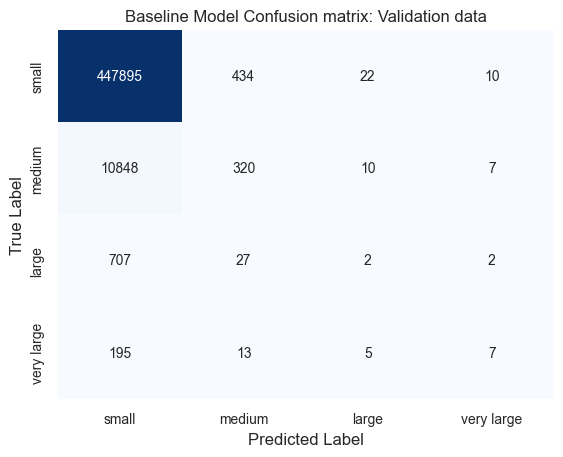

In [11]:
# conduct experiments and record results in an ablation table
train_and_evaluate_rf(
    n_estimators=100,
    max_depth=50
)